# **1. Dataset Introduction**

This dataset was obtained from Kaggle under the title **"Extrovert vs. Introvert Behavior Data"**.
It contains personality traits like extroversion and introversion shape how individuals interact with their social environments. This dataset provides insights into behaviors such as time spent alone, social event attendance, and social media engagement, enabling applications in psychology, sociology, marketing, and machine learning. Whether you're predicting personality types or analyzing social patterns, this dataset is your gateway to uncovering fascinating insights

* **Source**: [Extrovert vs. Introvert Behavior Data](https://www.kaggle.com/datasets/rakeshkapilavai/extrovert-vs-introvert-behavior-data)
* **Data Type**: Structured (CSV)
* **Target**: `Personality` column

**Feature Descriptions** in the dataset:

* **Time_spent_Alone**: Hours spent alone daily (0–11)
* **Stage_fear**: Presence of stage fright (Yes/No)
* **Social_event_attendance**: Frequency of social events (0–10)
* **Going_outside**: Frequency of going outside (0–7)
* **Drained_after_socializing**: Feeling drained after socializing (Yes/No)
* **Friends_circle_size**: Number of close friends (0–15)
* **Post_frequency**: Social media post frequency (0–10)
* **Personality**: Target variable (Extrovert/Introvert)

# **2. Import Library**

| **Library**    | **Function**                                                                             |
| -------------- | ---------------------------------------------------------------------------------------- |
| `pandas`       | Used for reading and manipulating tabular data (e.g., CSV files).                        |
| `numpy`        | Provides support for numerical operations, arrays, and mathematical tools.               |
| `matplotlib`   | Basic plotting library for creating visualizations like line charts, bars.               |
| `seaborn`      | Statistical visualization library built on top of matplotlib (e.g., heatmaps, boxplots). |
| `scikit-learn` | Provides preprocessing tools, machine learning models, and evaluation metrics.           |
| `joblib`       | Efficiently saves and loads Python objects like models, scalers, and encoders.           |
| `os`           | Provides functions for interacting with the operating system (e.g., file paths).       |
| `mlflow`       | Manages the machine learning lifecycle, including experimentation and deployment.       |
| `python-dotenv`| Loads environment variables from a `.env` file for configuration management.            |
| `dagshub`      | Enables version control and collaboration for machine learning experiments and datasets. |


In [1]:
%pip install pandas numpy matplotlib seaborn scikit-learn joblib mlflow dagshub streamlit python-dotenv

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip freeze > requirements.txt

In [3]:
import os # for file and directory manipulation
import pandas as pd  # for data manipulation and analysis
import numpy as np  # for numerical operations
import matplotlib.pyplot as plt  # for creating basic plots and charts
import seaborn as sns  # for statistical data visualization
from sklearn.model_selection import train_test_split  # for splitting the dataset into training and testing sets
from sklearn.preprocessing import StandardScaler, LabelEncoder  # for feature scaling and encoding categorical variables

# **3. Load Dataset**

In [4]:
# Get the absolute path of the root directory of the project
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Combine 
csv_path = os.path.join(BASE_DIR, "personality_dataset_raw.csv")

# Load the dataset from the root directory
df = pd.read_csv(csv_path)

# Show the first 5 rows to understand the structure
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


# **4. Exploratory Data Analysis (EDA)**

## Basic Data Overview

In [5]:
# Summary of dataset: data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


 **Insights from Basic Data Overview**

1. **Dataset Size and Completeness**

   * The dataset contains **2,900 rows and 8 columns**, **have duplicated values**, and **have missing values**.
   * This makes the dataset must to cleaning before ready for analysis.

2. **Feature Types**

   * There are **5 numeric (float64)** 
   *  **3 categorical/object features** such as `Personality` 

3. **Target Distribution (`Personality`)**

   * The `Personality` variable is object (`Introvert` or `Extrovert`).   

4. **Feature Observations**
    * **Time_spent_Alone**: Hours spent alone daily (0–11)
    * **Stage_fear**: Presence of stage fright (Yes/No)
    * **Social_event_attendance**: Frequency of social events (0–10)
    * **Going_outside**: Frequency of going outside (0–7)
    * **Drained_after_socializing**: Feeling drained after socializing (Yes/No)
    * **Friends_circle_size**: Number of close friends (0–15)
    * **Post_frequency**: Social media post frequency (0–10)
    * **Personality**: Target variable (Extrovert/Introvert)

5. **duplicated data** found in the data but no need to handle.

In [6]:
# Statistical summary of all columns
df.describe(include="all")

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
count,2837.000000,2827,2838.000000,2834.000000,2848,2823.000000,2835.000000,2900
unique,NaN,2,NaN,NaN,2,NaN,NaN,2
top,NaN,No,NaN,NaN,No,NaN,NaN,Extrovert
freq,NaN,1417,NaN,NaN,1441,NaN,NaN,1491
mean,4.505816,NaN,3.963354,3.000000,NaN,6.268863,3.564727,NaN
std,3.479192,NaN,2.903827,2.247327,NaN,4.289693,2.926582,NaN
min,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN
25%,2.000000,NaN,2.000000,1.000000,NaN,3.000000,1.000000,NaN
50%,4.000000,NaN,3.000000,3.000000,NaN,5.000000,3.000000,NaN
75%,8.000000,NaN,6.000000,5.000000,NaN,10.000000,6.000000,NaN


In [7]:
# Count and show duplicated rows
print("Number of duplicated rows:", df.duplicated().sum())

Number of duplicated rows: 388


In [8]:
# Check column that have missing values
df.isna().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

#### Displaying unique features value of object column

In [9]:
# List of categorical features and uniques values to check
categorical_features = df.select_dtypes(include='object').columns.tolist()

# Display unique values for each categorical feature
for col in categorical_features:
    unique_values = df[col].unique()
    print(f"Unique values in '{col}': {unique_values}")
    print(f"Number of unique values in '{col}': {len(unique_values)}\n")

Unique values in 'Stage_fear': ['No' 'Yes' nan]
Number of unique values in 'Stage_fear': 3

Unique values in 'Drained_after_socializing': ['No' 'Yes' nan]
Number of unique values in 'Drained_after_socializing': 3

Unique values in 'Personality': ['Extrovert' 'Introvert']
Number of unique values in 'Personality': 2



## Distribution of Target Variable (Personality)

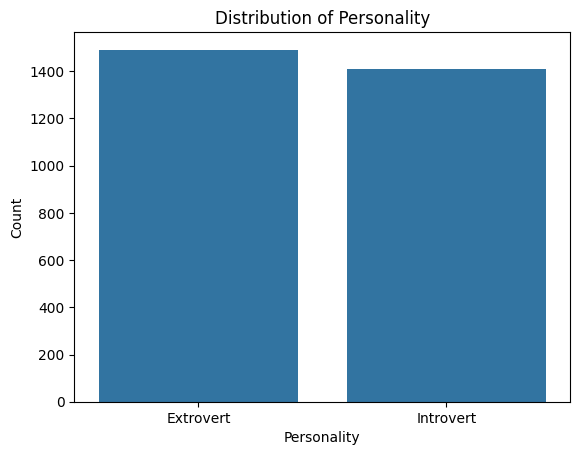

Percentage by class:
Personality
Extrovert    51.413793
Introvert    48.586207
Name: proportion, dtype: float64


In [10]:
# Visualize the distribution of the target variable
sns.countplot(x='Personality', data=df)
plt.title('Distribution of Personality')
plt.xlabel('Personality')
plt.ylabel('Count')
plt.show()

# Percentage distribution
print("Percentage by class:")
print(df['Personality'].value_counts(normalize=True) * 100)

From distribution of Personality, students are classified as *Personality*. The distribution bar chart shows the data is balance.

## Correlation Matrix with Target

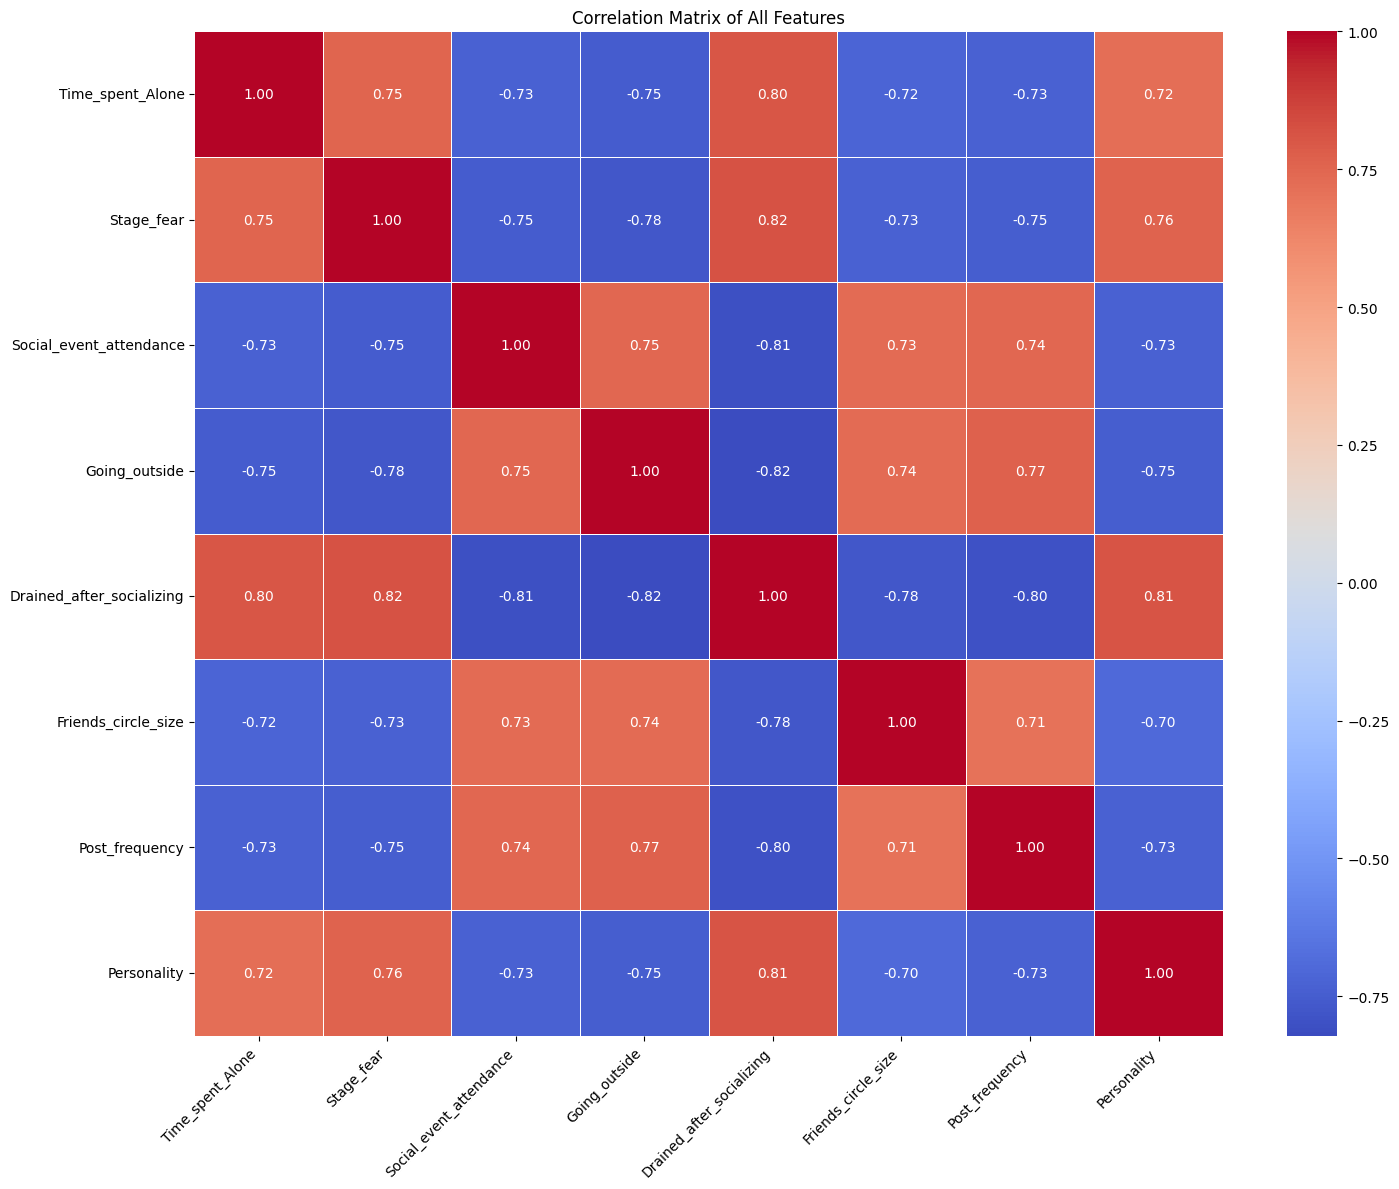

In [11]:
# Make a copy of the original dataframe
df_encoded = df.copy()

label_enc = LabelEncoder()

# Loop through all object columns and encode them
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = label_enc.fit_transform(df_encoded[col])

# Calculate the correlation matrix
corr_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of All Features")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

 **Top Features Associated with Human Personality**
 **Positively Associated Features**
1. **Time_spent_Alone**
   → Time Spent Alone give gave correlation with human personality and it's have effect to determine Introvert or Ekstovert person.

2. **Stage_fear**
   → Fear of stage or showing up at the stage is strong correlative with human personality.

3. **Drain_after_socializing**
   → Drain after sociallizing is one of the strong influences in determining personality.

---

 **Negatively Associated Features**

1. **Social_event_attendance**
   → Attending the event social have less correlative with the personality, because either introvert or ekstrovert can attending the event.

2. **Going_outside**
   → Going outside have less correlative with the personality, because introvert can going outside without fear.

3. **Friends_circle_size**
   → Ekstrovert or Introvert maybe can have same circle size.

4. **Post_frequency**
   → Social media post have less correlative with personality.

---

 **Key Insight**

> human personality is most influenced by quality time and how they are communicate not their activity.



## Detecting Outliers for Top Positive and Negative Associated Features

Index(['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
       'Friends_circle_size', 'Post_frequency'],
      dtype='object')


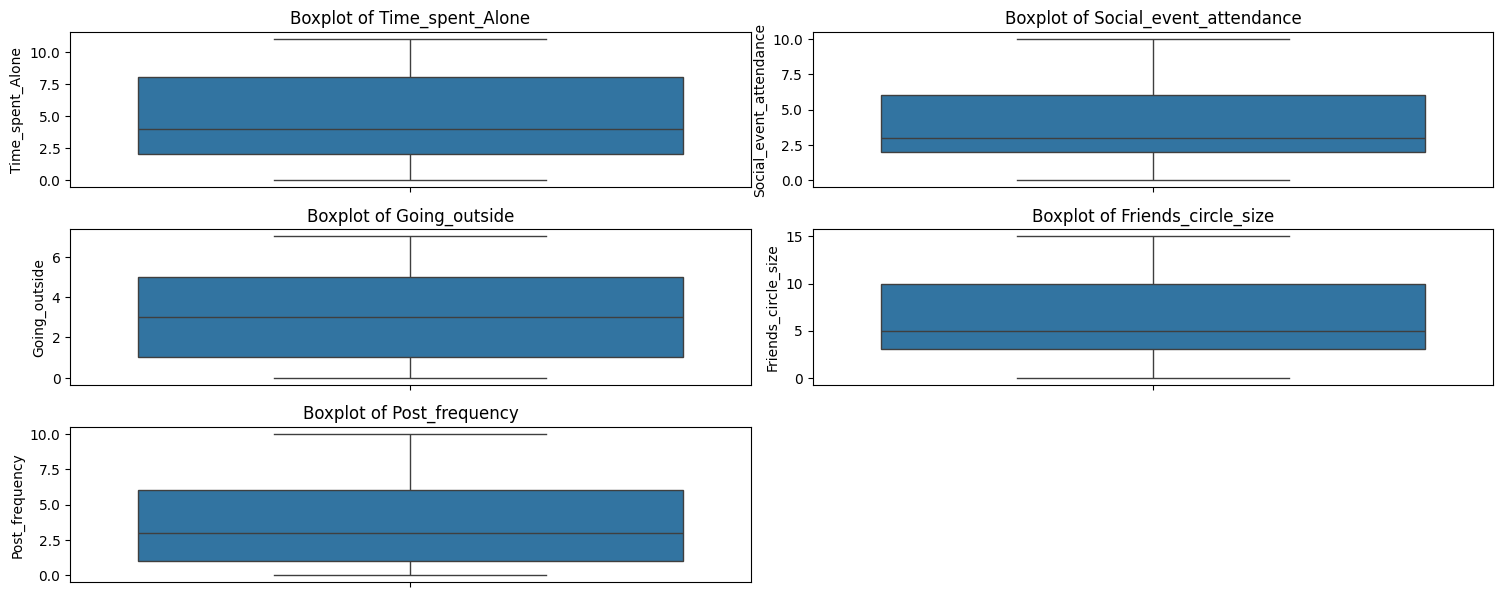

In [12]:
# List of numeric features to check
features_to_check = df.select_dtypes(include="number").columns
print(features_to_check)

# Boxplot visualization
plt.figure(figsize=(15, 8))
for i, col in enumerate(features_to_check):
    plt.subplot(4, 2, i+1)
    sns.boxplot(y=df_encoded[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

**Insight**
* All numeric column don't have outliers, and don't need special attention to fix it

# **5. Data Preprocessing**

In [13]:
df_processed = df.copy()

## Handling Missing Values

In [14]:
# Get numeric column that have missing values 
missing_cols_numeric = df_processed.select_dtypes(include="number").columns[df.select_dtypes(include="number").isnull().any()]
print(missing_cols_numeric)
print()

# Get object column that have missing values 
missing_cols_object = df_processed.select_dtypes(include="object").columns[df.select_dtypes(include="object").isnull().any()]
print(missing_cols_object)

Index(['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
       'Friends_circle_size', 'Post_frequency'],
      dtype='object')

Index(['Stage_fear', 'Drained_after_socializing'], dtype='object')


In [15]:
# Impute numerical columns with the median
for col in missing_cols_numeric:
    df_processed[col].fillna(df_processed[col].median(), inplace=True)

# Impute categorical columns with the mode
for col in missing_cols_object:
    if col in df_processed.columns:
        df_processed[col].fillna(df_processed[col].mode()[0], inplace=True)

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_20000\2233039039.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed[col].fillna(df_processed[col].median(), inplace=True)
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_20000\2233039039.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [16]:
df_processed.isna().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [17]:
df_processed.describe(include='all')

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
count,2900.000000,2900,2900.000000,2900.000000,2900,2900.000000,2900.000000,2900
unique,NaN,2,NaN,NaN,2,NaN,NaN,2
top,NaN,No,NaN,NaN,No,NaN,NaN,Extrovert
freq,NaN,1490,NaN,NaN,1493,NaN,NaN,1491
mean,4.494828,NaN,3.942759,3.000000,NaN,6.235172,3.552069,NaN
std,3.441971,NaN,2.875987,2.221597,NaN,4.237255,2.894794,NaN
min,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN
25%,2.000000,NaN,2.000000,1.000000,NaN,3.000000,1.000000,NaN
50%,4.000000,NaN,3.000000,3.000000,NaN,5.000000,3.000000,NaN
75%,7.000000,NaN,6.000000,5.000000,NaN,10.000000,6.000000,NaN


## Encoding Categorical Data

In [18]:
label_enc = LabelEncoder()

# Dictionary to store encoders
encoders = {}

# Encode categorical features
categorical_features = df_processed.select_dtypes(include='object').columns.tolist()

# Get  numerical feature
numerical_features = df_processed.select_dtypes(include=['number']).columns.tolist()

for col in categorical_features:
    label_enc = LabelEncoder()
    df_processed[col] = label_enc.fit_transform(df_processed[col])
    encoders[col] = label_enc 

## Feature Scaling

In [19]:
X = df_processed.drop(columns=['Personality'])
y = df_processed['Personality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_features])

## Combine Scaled Features with Encoded Categorical Features

In [20]:
# Convert scaled features back to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=numerical_features)

# Add encoded categorical features to the scaled DataFrame
for col in categorical_features:
    X_scaled[col] = df_processed[col].values
   
# Reorder columns to match original DataFrame
X_scaled = X_scaled[X.columns]

# Display the first few rows
print("Features after combination:\n", X_scaled.head())

Features after combination:
    Time_spent_Alone  Stage_fear  Social_event_attendance  Going_outside  \
0         -0.143788           0                 0.019907       1.350613   
1          1.309119           1                -1.371160      -1.350613   
2          1.309119           1                -1.023393      -0.450204   
3         -1.306113           0                 0.715440       1.800817   
4         -0.434369           0                 1.758740       0.450204   

   Drained_after_socializing  Friends_circle_size  Post_frequency  
0                          0             1.596787        0.500271  
1                          1            -1.471766       -0.190744  
2                          1            -0.291553       -0.536251  
3                          0             1.832829        1.536793  
4                          0             0.416574        0.500271  


## Split Data 80:20

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

## Export Data to CSV

In [22]:
# Combine X_scaled and y into a final DataFrame
df_final = pd.concat([X_scaled, y.reset_index(drop=True)], axis=1)

df_final.to_csv("extrovert_introvert_processed.csv", index=False)

print("✅ Preprocessing complete. File saved as 'student_depression_processed.csv'")

✅ Preprocessing complete. File saved as 'student_depression_processed.csv'
